## 001 データを読み込んでみる

In [60]:
import datetime
import pandas as pd

In [21]:
cutomer_master = pd.read_csv('./input/100knoks/001/customer_master.csv')
cutomer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [22]:
item_master = pd.read_csv('./input/100knoks/001/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [23]:
transaction_1 = pd.read_csv('./input/100knoks/001/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [24]:
transaction_2 = pd.read_csv('./input/100knoks/001/transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [25]:
transaction_detail_1 = pd.read_csv('./input/100knoks/001/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [26]:
transaction_detail_2 = pd.read_csv('./input/100knoks/001/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


## 002 データを結合してみる Union

In [27]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [28]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))


5000
1786
6786


In [29]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [30]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


## 003 データを結合する Join

In [31]:
transaction_join = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
transaction_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [32]:
print(len(transaction_detail))
print(len(transaction))
print(len(transaction_join))

7144
6786
7144


## 004 マスターを結合する Join

In [37]:
#transaction_join = pd.merge(transaction_join, cutomer_master[['customer_id', 'customer_name', 'registration_date', 'customer_name_kana', 'email', 'gender', 'age', 'birth', 'pref']], on='customer_id', how='left')
transaction_join = pd.merge(transaction_join, cutomer_master, on='customer_id', how='left')
transaction_join = pd.merge(transaction_join, item_master, on='item_id', how='left')
transaction_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name_x,registration_date_x,customer_name_kana_x,email_x,...,customer_name_y,registration_date_y,customer_name_kana_y,email_y,gender_y,age_y,birth_y,pref_y,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,...,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,...,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,...,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,...,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,...,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [38]:
print(len(transaction))
print(len(transaction_detail))
print(len(transaction_join))

6786
7144
7144


## 005 売上の列を追加

In [41]:
transaction_join['price'] = transaction_join['quantity'] * transaction_join['item_price']
transaction_join[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## 006 データを検算
合計値があってるかを比較して検算

In [50]:
print(transaction_join['price'].sum() == transaction['price'].sum())
print(transaction_join['price'].sum())
print(transaction['price'].sum())

True
971135000
971135000


## 007 統計量の把握

In [52]:
transaction_join.describe()

,detail_id,quantity,age_x,age_y,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,80.000000,210000.000000,420000.000000


In [54]:
transaction_join.isnull().sum()

detail_id               0
transaction_id          0
item_id                 0
quantity                0
payment_date            0
customer_id             0
customer_name_x         0
registration_date_x     0
customer_name_kana_x    0
email_x                 0
gender_x                0
age_x                   0
birth_x                 0
pref_x                  0
customer_name_y         0
registration_date_y     0
customer_name_kana_y    0
email_y                 0
gender_y                0
age_y                   0
birth_y                 0
pref_y                  0
item_name               0
item_price              0
price                   0
dtype: int64

## 008 月別に集計

In [55]:
transaction_join.dtypes

detail_id                int64
transaction_id          object
item_id                 object
quantity                 int64
payment_date            object
customer_id             object
customer_name_x         object
registration_date_x     object
customer_name_kana_x    object
email_x                 object
gender_x                object
age_x                    int64
birth_x                 object
pref_x                  object
customer_name_y         object
registration_date_y     object
customer_name_kana_y    object
email_y                 object
gender_y                object
age_y                    int64
birth_y                 object
pref_y                  object
item_name               object
item_price               int64
price                    int64
dtype: object

In [68]:
transaction_join['patment_date'] = pd.to_datetime(transaction_join['payment_date'])
transaction_join['payment_month'] = transaction_join['patment_date'].dt.strftime("%Y%m")
transaction_join[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [69]:
transaction_join.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

## 009 月別、商品別で集計

groupbyを使って表示

In [74]:
transaction_join.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

Pivotを使って表示

In [78]:
pd.pivot_table(transaction_join, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

## 010 可視化してみる

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='payment_month', ylabel='price'>

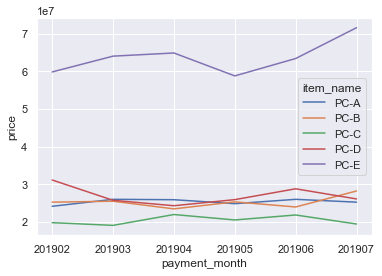

In [137]:
graph_data = transaction_join.groupby(['item_name', 'payment_month']).sum()
sns.set()
sns.lineplot(x='payment_month', y='price', hue='item_name', data=graph_data)